In [22]:
import sys
import os
import collections
from collections import defaultdict
import numpy as np
import pandas as pd
from scipy import stats
import re
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
st_x= StandardScaler()

In [23]:
cs_file = "csv_data/student_admission_data.csv"
data = pd.read_csv(cs_file)
data.shape


z:\django projects\project_for_nino\university_recommendation_system\venv_ips\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (8,13,17,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(53644, 26)

In [24]:
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,termAndYear,confPubs,ugCollege,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit
0,Aug-13,Electronics and Communication,0,0,NaN,97.0,MS,ECE,NaN,0.0,...,Fall - 2013,0,0,NaN,79.00,NaN,100.0,NaN,University of Massachusetts Amherst,1.0
1,Aug-13,Electronics and Communication,0,0,NaN,97.0,MS,ECE,NaN,0.0,...,Fall - 2013,0,0,NaN,79.00,NaN,100.0,NaN,Arizona State University,0.0
2,ninny.rgs,Electrical Engineering,0,0,NaN,101.0,MS,Electrical Engineering,NaN,0.0,...,Fall - 2011,0,A C Patil College of Engineering,NaN,72.27,NaN,100.0,NaN,Worcester Polytechnic Institute,1.0
3,aashishg11,Electrical Engineering,0,0,Automation,91.0,MS,Instrumentation,NaN,0.0,...,Fall - 2013,0,A C Patil College of Engineering,NaN,56.11,NaN,100.0,NaN,Worcester Polytechnic Institute,0.0
4,ninny.rgs,Electrical Engineering,0,0,NaN,101.0,MS,Electrical Engineering,NaN,0.0,...,Fall - 2011,0,A C Patil College of Engineering,NaN,72.27,NaN,100.0,NaN,University of Southern California,1.0


In [17]:
data = data[data['admit'] > 0]
data = data.drop('admit', 1)

data.shape

(27944, 25)

In [18]:

data = data[pd.notnull(data['greQ'])]
data.shape

(27016, 25)

In [19]:
data['greQ'] = data['greQ'].fillna(130)
data['greV'] = data['greV'].fillna(130)
data['greA'] = data['greA'].fillna(0)
data.greA.head()

0    0.0
2    4.5
4    4.5
5    4.5
6    2.0
Name: greA, dtype: float64

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

data.isna().sum()

userName               0
major                 44
researchExp            0
industryExp            0
specialization     11606
toeflScore          1915
program                0
department             1
toeflEssay         21197
internExp              5
greV                   0
greQ                   0
userProfileLink        0
journalPubs            0
greA                   0
topperCgpa             1
termAndYear            0
confPubs               0
ugCollege           1013
gmatA              26999
cgpa                   0
gmatQ              26998
cgpaScale              0
gmatV              27002
univName               0
dtype: int64

In [21]:

uni_names = data['univName'].unique()

similar_univs = pd.DataFrame({'univName':uni_names})

similar_univs.to_csv('univ_names.csv')
similar_univs

,univName
0,University of Massachusetts Amherst
1,Worcester Polytechnic Institute
2,University of Southern California
3,New Jersey Institute of Technology
4,University of Texas Dallas
5,University of Texas Arlington
6,Syracuse University
7,Arizona State University
8,SUNY Stony Brook
9,University of North Carolina Charlotte


In [81]:
data.describe()

,researchExp,industryExp,toeflScore,internExp,greV,greQ,greA,topperCgpa,gmatA,cgpa,gmatQ,cgpaScale
count,27016.000000,27016.000000,25101.000000,27011.000000,27016.000000,27016.000000,27016.000000,27015.000000,17.000000,27016.000000,18.000000,27016.000000
mean,0.297268,3.473127,109.712760,0.391544,327.565369,428.876962,5.048072,36.062195,15.705882,39.970304,47.833333,55.681744
std,2.463456,11.237774,39.269369,2.322603,215.138205,319.914023,37.386049,37.638043,32.488007,33.924200,23.397461,45.625091
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,8.000000,0.000000
25%,0.000000,0.000000,101.000000,0.000000,152.000000,162.000000,3.000000,7.922000,4.000000,8.290000,41.000000,10.000000
50%,0.000000,0.000000,107.000000,0.000000,160.000000,168.000000,3.500000,9.600000,4.000000,54.000000,46.000000,100.000000
75%,0.000000,0.000000,111.000000,0.000000,550.000000,780.000000,4.000000,80.000000,5.000000,72.600000,50.000000,100.000000
max,53.000000,138.000000,1350.000000,96.000000,5103.000000,7990.000000,1470.000000,100.000000,102.000000,833.000000,102.000000,100.000000


In [82]:
def convert_quant_score(quant_score):
    quant_list = []
    quant_score = quant_score.tolist()
    for old_quant in quant_score:
        if old_quant <= 170:
            quant_list.append(old_quant)
            continue
        else:
            old_quant = old_quant/4.7
            if old_quant <=130:
                quant_list.append(130)
            else:
                quant_list.append(old_quant)
    return quant_list

def convert_verbal_score(verbal_score):
    verbal_list = []
    verbal_score = verbal_score.tolist()
    for old_verbal in verbal_score:
        if old_verbal <= 170:
            verbal_list.append(old_verbal)
            continue
        else:
            old_verbal = old_verbal/4.7
            if old_verbal <=130:
                verbal_list.append(130)
            else:
                verbal_list.append(old_verbal)
    return verbal_list

data['greQ'] = convert_quant_score(data['greQ'])
data['greV'] = convert_verbal_score(data['greV'])

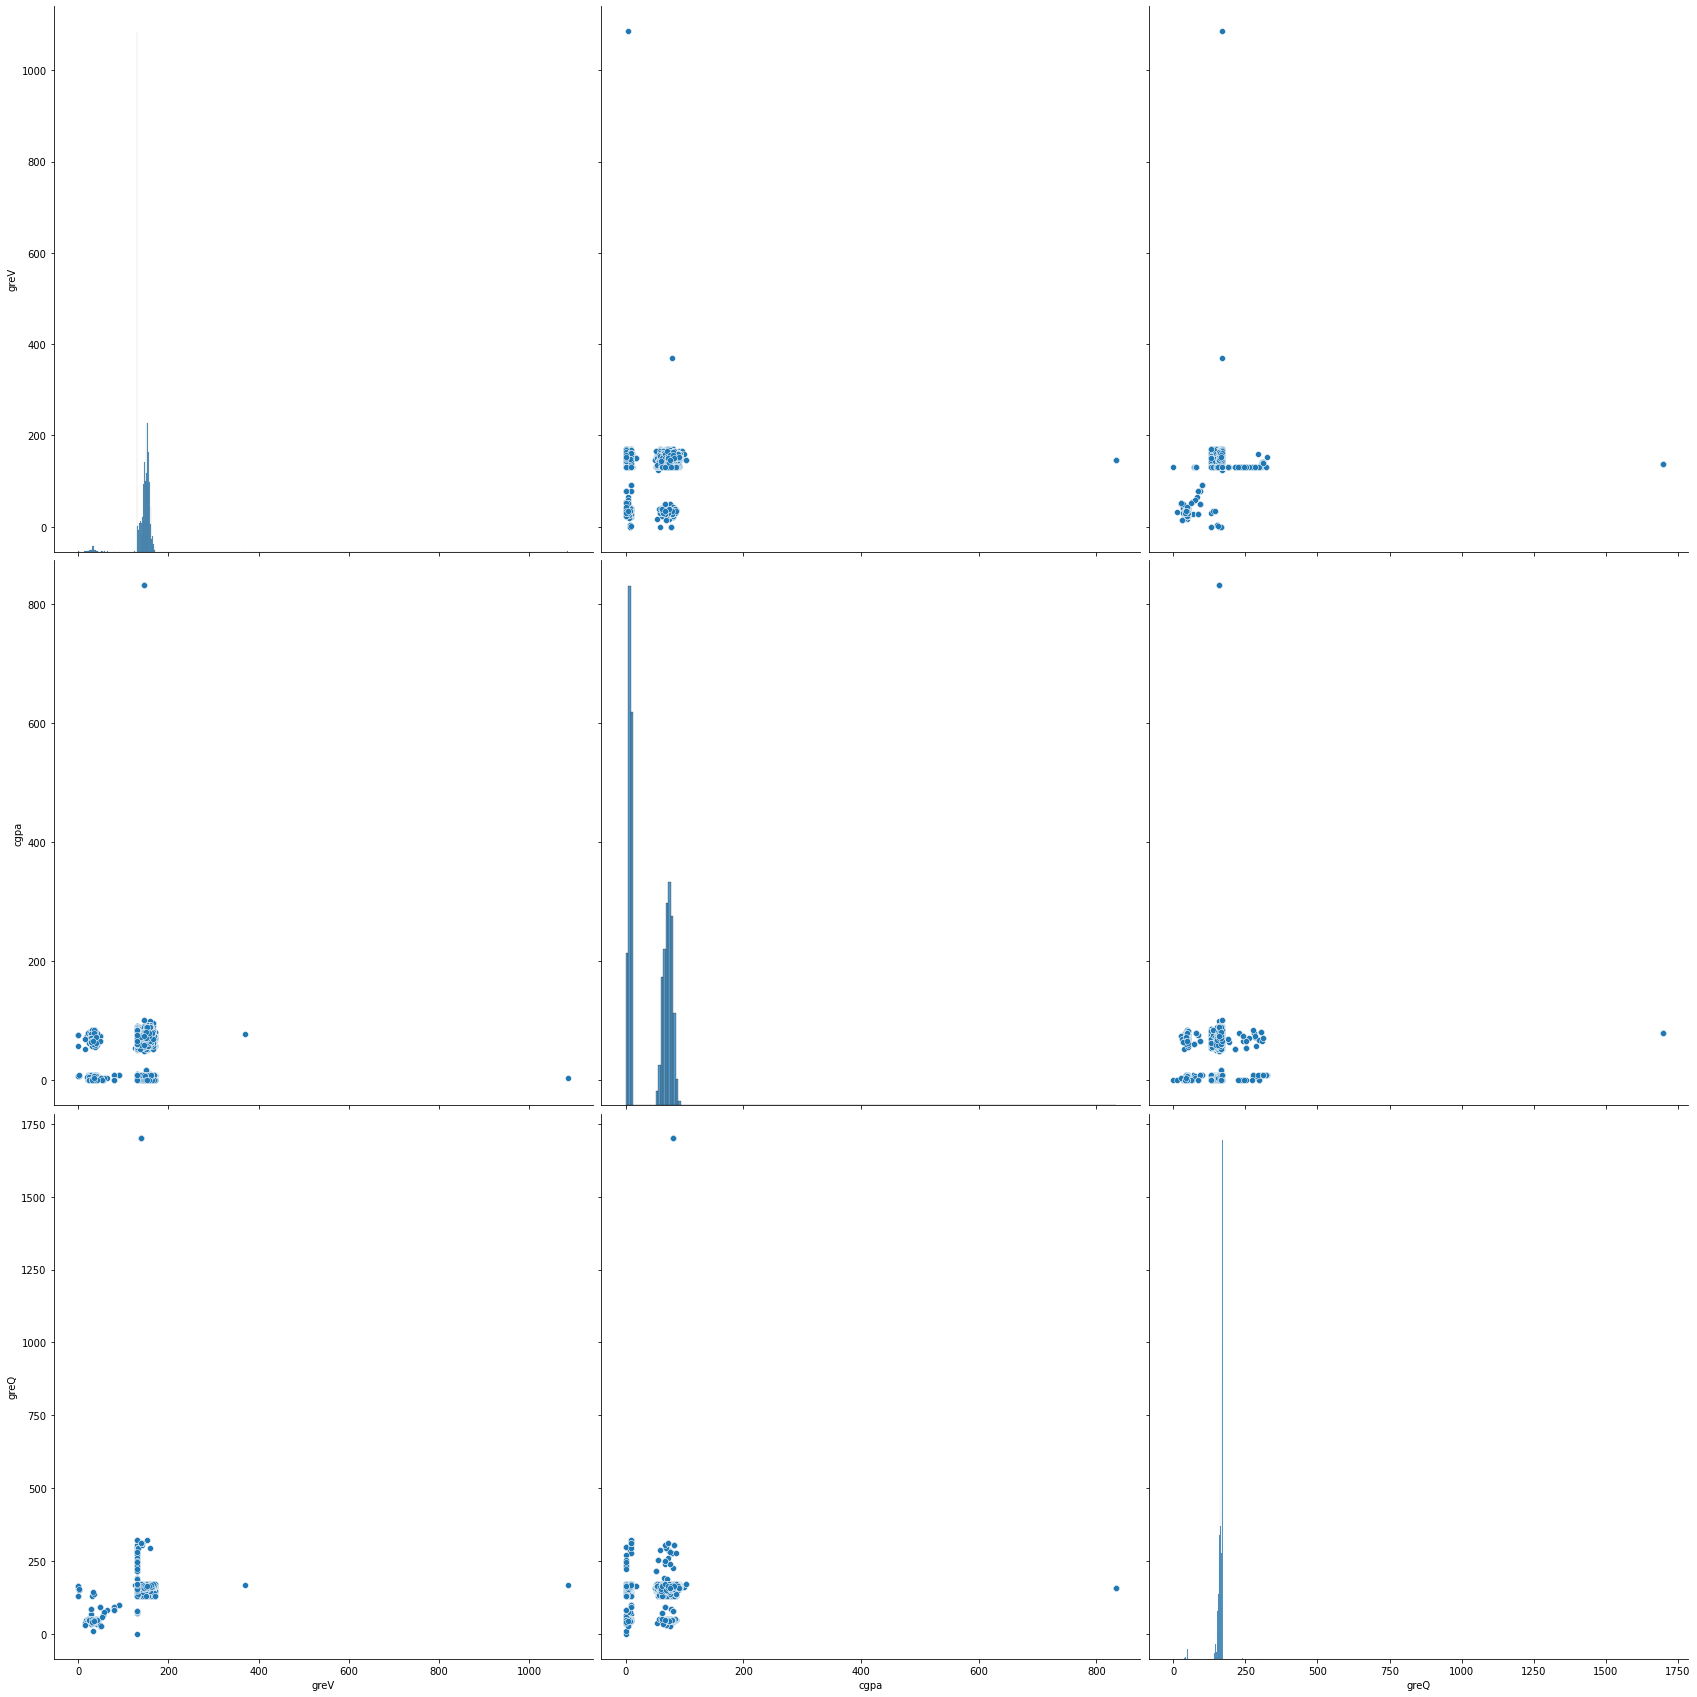

In [83]:
sns.pairplot(data, palette="husl", x_vars=["greV","cgpa","greQ"], y_vars=["greV","cgpa","greQ"], height=8)
plt.show()

In [70]:
def normalize_gpa(data2, cgpa, totalcgpa):
    cgpa = data2[cgpa].tolist()
    totalcgpa = data2[totalcgpa].tolist()
    for i in range(len(cgpa)):
        if totalcgpa[i] != 0:
            cgpa[i] = cgpa[i] / totalcgpa[i]
        else:
            cgpa[i] = 0
    data2['cgpa'] = cgpa
    return data2

In [72]:

data = data.drop('gmatA', 1)
data = data.drop('gmatQ', 1)
data = data.drop('gmatV', 1)
data = data.drop('specialization', 1)
data = data.drop('department', 1)
data = data.drop('program', 1)
data = data.drop('toeflEssay', 1)
data = data.drop('userProfileLink', 1)
data = data.drop('topperCgpa', 1)
data = data.drop('termAndYear', 1)
data = data.drop('userName', 1)
data = data.drop('toeflScore', 1)
# data = data.drop('major', 1)

data = data.dropna()
# data2 = data.drop('ugCollege', 1)
data2 = normalize_gpa(data2, 'cgpa', 'cgpaScale')

data2 = data2.drop('industryExp', 1)
data2 = data2.drop('internExp', 1)
data2 = data2.drop('researchExp', 1)
data2 = data2.drop('confPubs', 1)
data2 = data2.drop('cgpaScale', 1)
# data2 = data2.drop('toeflScore', 1)
data2 = data2.drop('journalPubs', 1)
data = data2
university_list = list(set(data['univName'].tolist()))
for i in range(len(university_list)):
	if(len(data[data['univName'] == university_list[i]]) < 100):
		data = data[data['univName'] != university_list[i]]
data = data.dropna()

data.head()

KeyError: "['gmatA'] not found in axis"

In [59]:
from sklearn.preprocessing import LabelEncoder  
labelencoder_y= LabelEncoder()  
data['major']= labelencoder_y.fit_transform(data['major'])
data['ugCollege']= labelencoder_y.fit_transform(data['ugCollege'])
data.head()

KeyError: 'ugCollege'

In [34]:
processed_data = data[['major', 'greV', 'greQ', 'greA', 'cgpa', 'univName']]

processed_data.to_csv('Processed_data.csv')
processed_data.head()

,major,greV,greQ,greA,cgpa,univName
0,84,143.0,156.000000,0.0,0.7900,University of Massachusetts Amherst
4,72,130.0,157.446809,4.5,0.7227,University of Southern California
5,72,130.0,157.446809,4.5,0.7227,New Jersey Institute of Technology
6,72,130.0,155.319149,2.0,0.8150,University of Texas Dallas
8,52,147.0,164.000000,2.5,0.6200,University of Texas Arlington


In [35]:
cs_file = "Processed_data.csv"
processed_data = pd.read_csv(cs_file)
processed_data.index = pd.RangeIndex(start=0,step=1,stop=len(processed_data))

In [36]:
processed_data.shape

(25602, 7)

In [37]:

import math
from sklearn import neighbors, datasets
from numpy.random import permutation
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support

In [38]:

#similar_univs = pandas.read_csv('similar_universities.csv')
random_indices = permutation(data.index)
test_cutoff = math.floor(len(data)/5)
print(test_cutoff)
test = processed_data.loc[random_indices[1:test_cutoff]]
train = processed_data.loc[random_indices[test_cutoff:]]
train_output_data = train['univName']
print("train Output data", train_output_data)
train_input_data = train
train_input_data = train_input_data.drop('univName',1)
print("train input data", train_input_data)
test_output_data = test['univName']
print("test Output data", test_output_data)
test_input_data = test
test_input_data = test_input_data.drop('univName',1)
print("test input data", test_input_data)

5120


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([31456, 31840, 31146, 37949, 36121,\n            ...\n            47918, 26181, 38154, 43686, 28170],\n           dtype='int64', length=2597). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [39]:
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

def knn(trainingSet, testInstance, k):
    print(k)
    distances = {}
    sort = {}
    length = testInstance.shape[1]

    for x in range(len(trainingSet)):

        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)
        
        distances[x] = dist[0]

    sorted_d = sorted(distances.items(), key=lambda x: x[1])

    neighbors = []

    for x in range(k):
        neighbors.append(sorted_d[x][0])

    classVotes = {}

    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1

    sortedVotes = sorted(classVotes.items(), key=lambda x: x[1], reverse=True)
 
    return(sortedVotes, neighbors)

In [ ]:
testSet = [[90,136.8085106, 4, 0.6941]]
test = pd.DataFrame(testSet)
test.shape


In [ ]:

k = 5

result,neigh= knn(processed_data, test, k)


list1 = []
list2 = []
for i in result:
    list1.append(i[0])
    list2.append(i[1])
for i in list1:
    print(i)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(processed_data.iloc[:,0:4], data['univName'])

print(neigh.predict(test))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(processed_data.iloc[:,0:4], data['univName'])

print(neigh.predict(test))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets, preprocessing
cs_file = "Processed_data.csv"

data_with_index = pd.read_csv(cs_file)
data_with_index.drop(data_with_index.columns[data_with_index.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data_with_index.head()
data_with_index.value_counts()

# Get the count of each value
value_counts = data_with_index['univName'].value_counts()

# Select the values where the count is less than 3 (or 5 if you like)
to_remove = value_counts[value_counts <= 2].index

# Keep rows where the city column is not in to_remove
data_with_index = data_with_index[~data_with_index.univName.isin(to_remove)]
data_with_index.value_counts()
X= data_with_index.iloc[:, :-1].values 
y= data_with_index.iloc[:,5].values  

Xtrain, Xtest, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1, train_size = 0.8)
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

print(accuracy_score(y_test, y_pred))

0.14124293785310735
